<a href="https://colab.research.google.com/github/rachocr/CCADMACL_EXAM_COM222ML/blob/main/Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCADMACL (Midterm Exam)

## Import the libraries

In [634]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [635]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

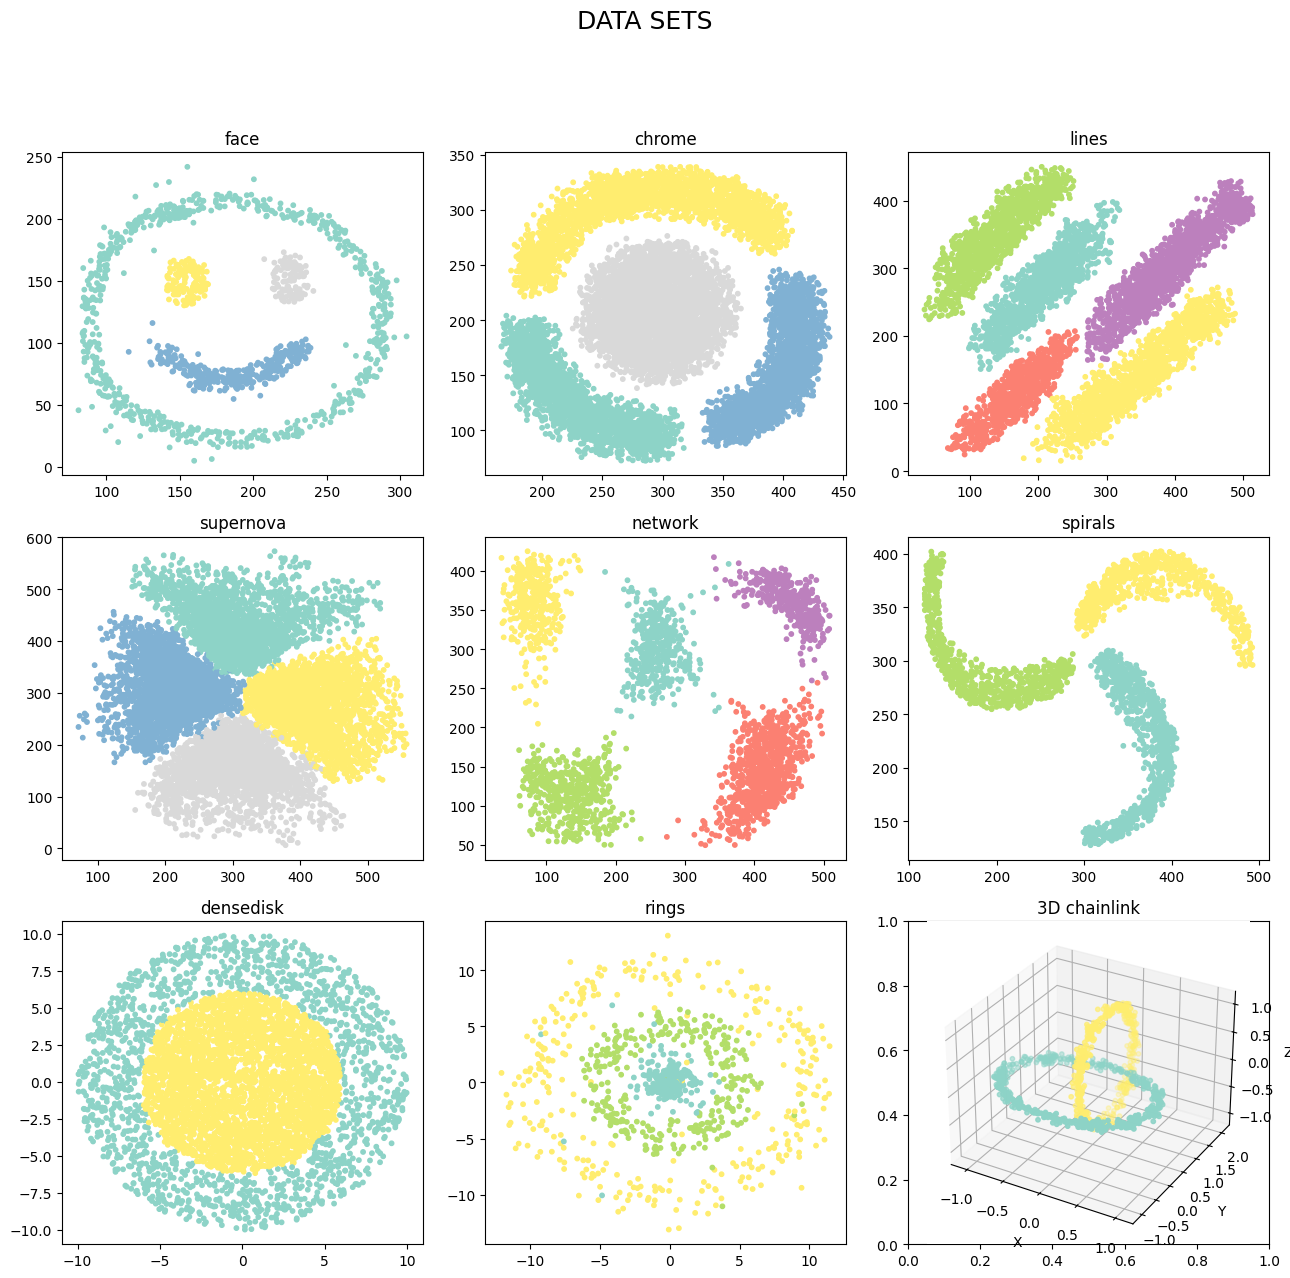

In [636]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [637]:
face_kmeans_df = face_df.copy()
chrome_kmeans_df = chrome_df.copy()
lines2_kmeans_df = lines2_df.copy()
supernova_kmeans_df = supernova_df.copy()
network_kmeans_df = network_df.copy()
spirals_kmeans_df = spirals_df.copy()
densedisk_kmeans_df = densedisk_df.copy()
rings_kmeans_df = rings_df.copy()
chainlink_kmeans_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [638]:
face_kmeans_df = face_kmeans_df.drop(columns=['color'])
chrome_kmeans_df = chrome_kmeans_df.drop(columns=['color'])
lines2_kmeans_df = lines2_kmeans_df.drop(columns=['color'])
supernova_kmeans_df = supernova_kmeans_df.drop(columns=['color'])
network_kmeans_df = network_kmeans_df.drop(columns=['color'])
spirals_kmeans_df = spirals_kmeans_df.drop(columns=['color'])
densedisk_kmeans_df = densedisk_kmeans_df.drop(columns=['color'])
rings_kmeans_df = rings_kmeans_df.drop(columns=['color'])
chainlink_kmeans_df = chainlink_kmeans_df.drop(columns=['color'])

3. Train a K-means model for each dataset.

In [639]:
kmeans_face = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans_face = kmeans_face.fit_predict(face_kmeans_df)

kmeans_chrome = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans_chrome = kmeans_chrome.fit_predict(chrome_kmeans_df)

kmeans_lines2 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_lines2 = kmeans_lines2.fit_predict(lines2_kmeans_df)

kmeans_supernova = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans_supernova = kmeans_supernova.fit_predict(supernova_kmeans_df)

kmeans_network = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_network = kmeans_network.fit_predict(network_kmeans_df)

kmeans_spirals = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans_spirals = kmeans_spirals.fit_predict(spirals_kmeans_df)

kmeans_densedisk = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans_densedisk = kmeans_densedisk.fit_predict(densedisk_kmeans_df)

kmeans_rings = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans_rings = kmeans_rings.fit_predict(rings_kmeans_df)

kmeans_chainlink = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans_chainlink = kmeans_chainlink.fit_predict(chainlink_kmeans_df)


4. Add a "Cluster" column for each data set

In [640]:
face_kmeans_df['Cluster'] = y_kmeans_face
chrome_kmeans_df['Cluster'] = y_kmeans_chrome
lines2_kmeans_df['Cluster'] = y_kmeans_lines2
supernova_kmeans_df['Cluster'] = y_kmeans_supernova
network_kmeans_df['Cluster'] = y_kmeans_network
spirals_kmeans_df['Cluster'] = y_kmeans_spirals
densedisk_kmeans_df['Cluster'] = y_kmeans_densedisk
rings_kmeans_df['Cluster'] = y_kmeans_rings
chainlink_kmeans_df['Cluster'] = y_kmeans_chainlink


5. Plot the Correct cluster and the K-means cluster

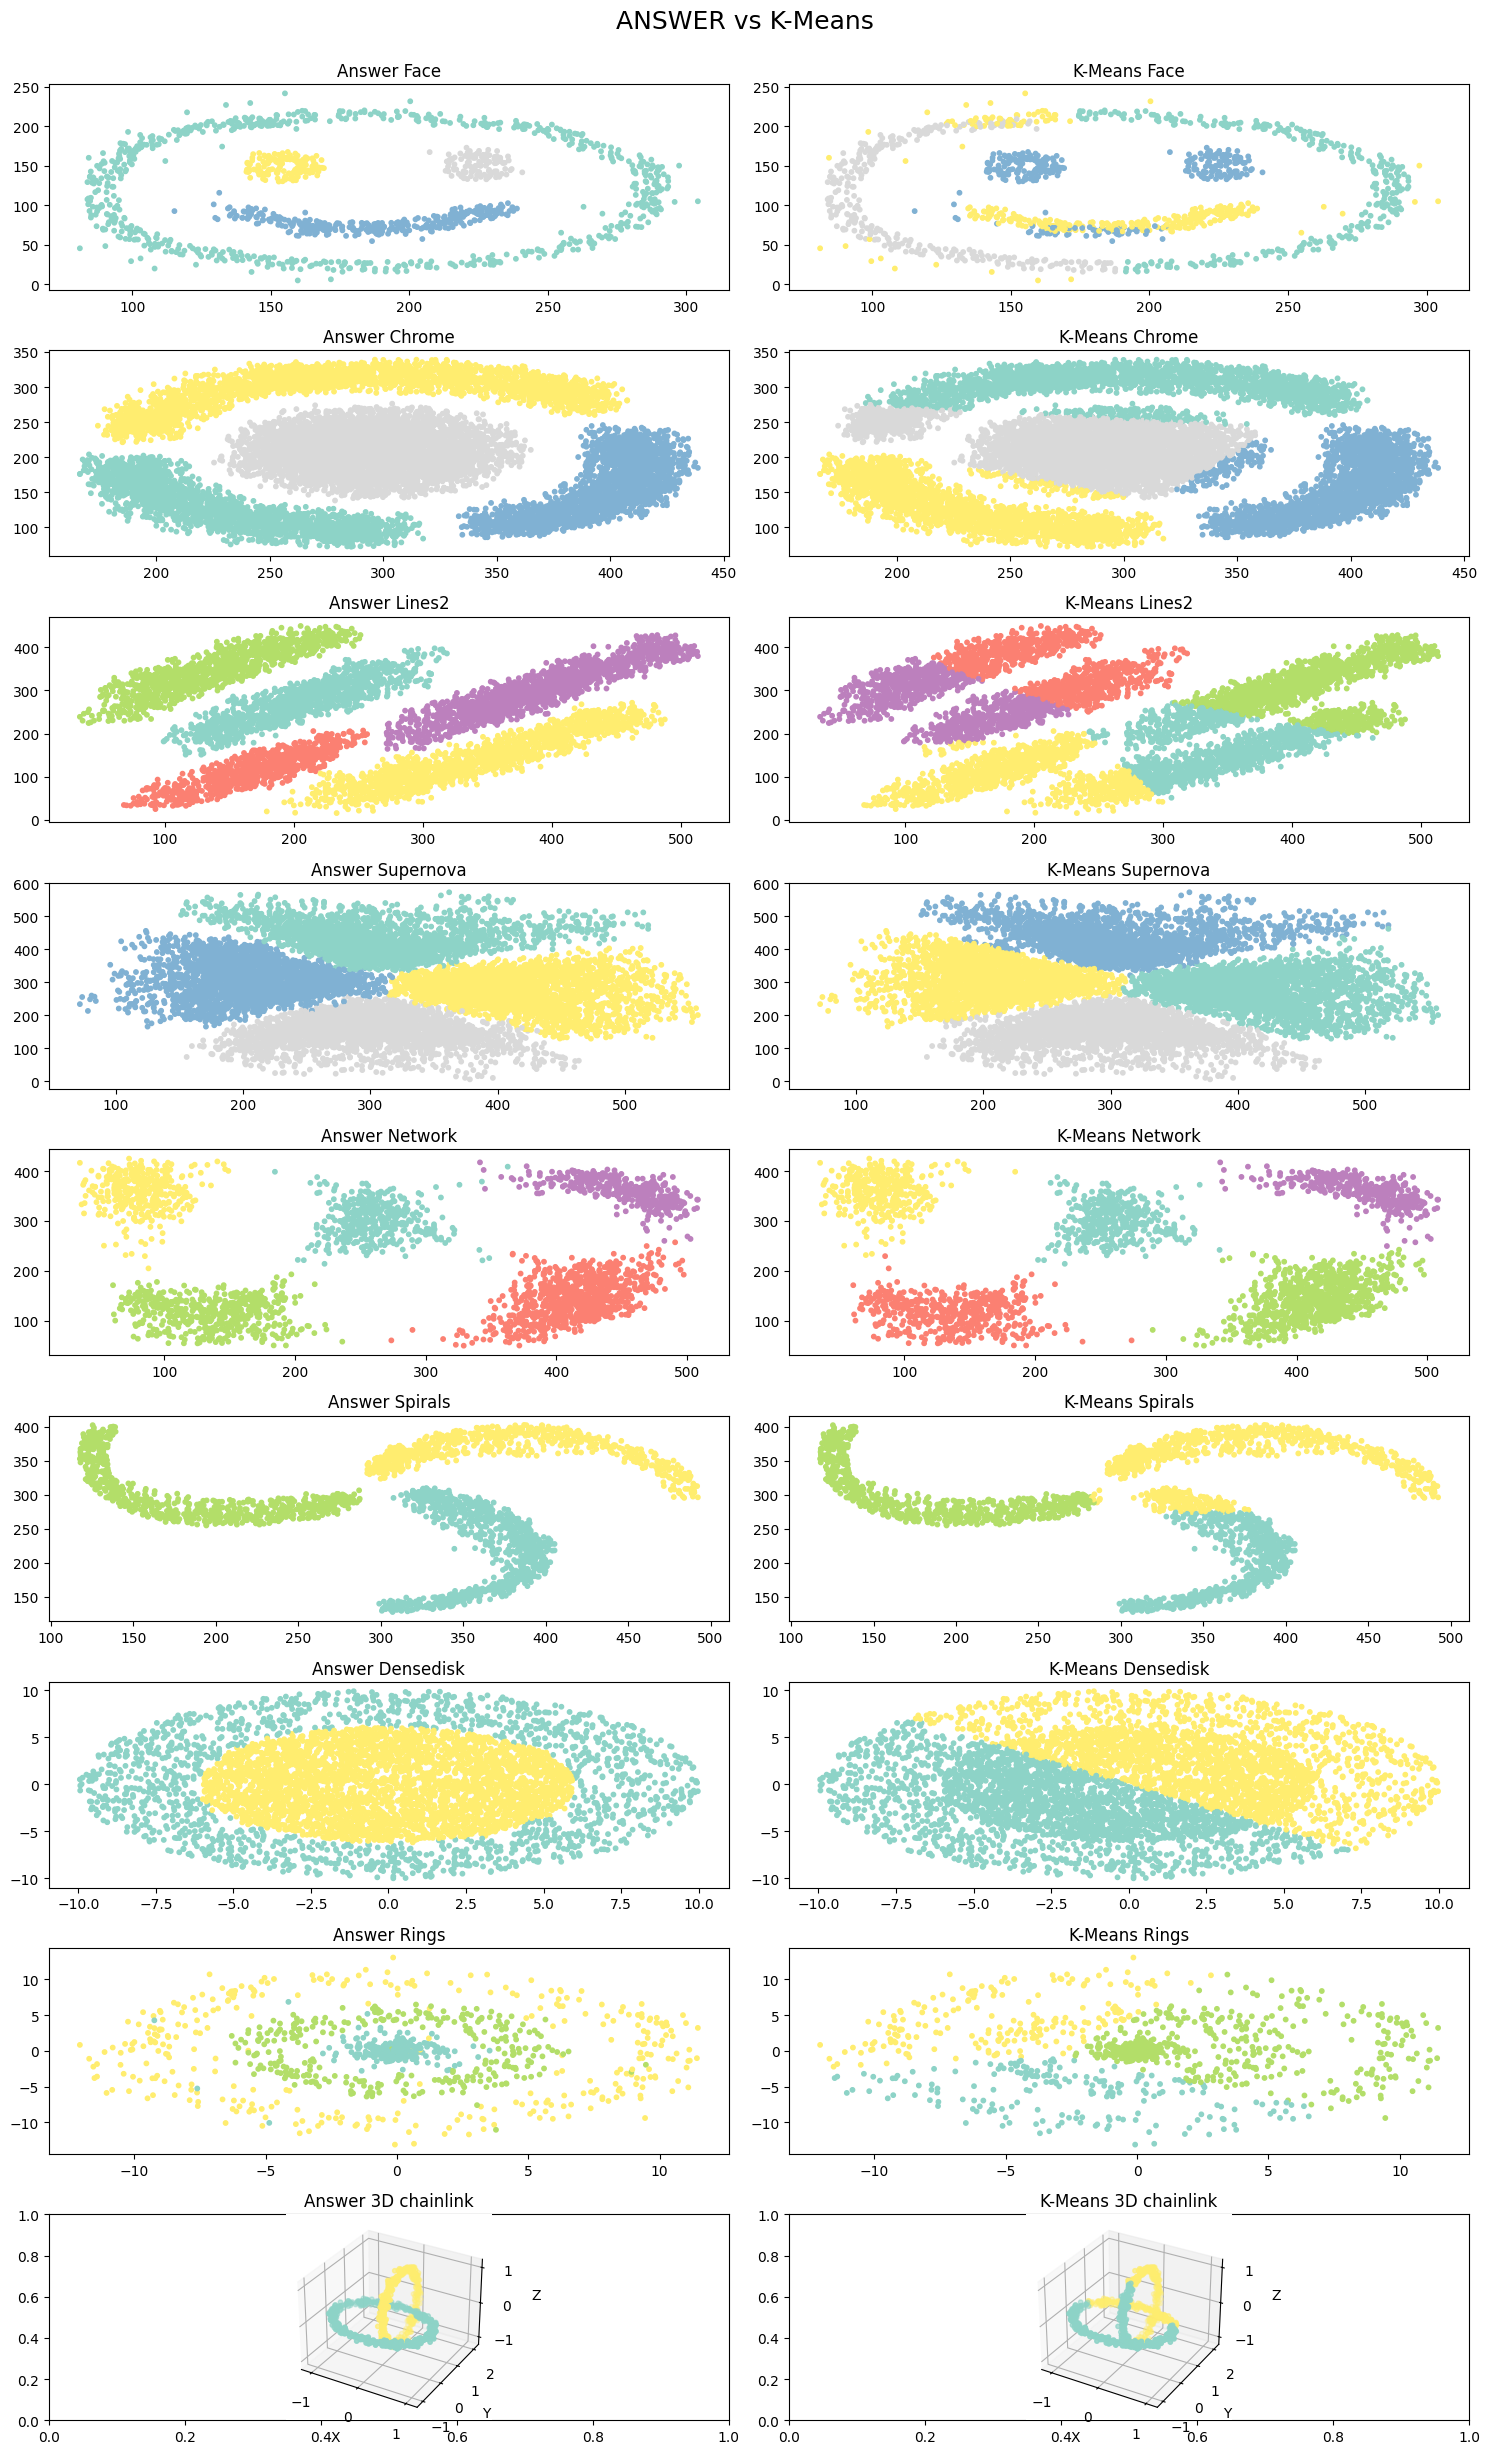

In [641]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 25))
fig.suptitle('ANSWER vs K-Means\n', size=18)

# Compare Face dataset
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("Answer Face")
axes[0, 1].scatter(face_kmeans_df['x'], face_kmeans_df['y'], c=face_kmeans_df['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("K-Means Face")

# Compare Chrome dataset
axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("Answer Chrome")
axes[1, 1].scatter(chrome_kmeans_df['x'], chrome_kmeans_df['y'], c=chrome_kmeans_df['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("K-Means Chrome")

  # Compare Lines2 dataset
axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("Answer Lines2")
axes[2, 1].scatter(lines2_kmeans_df['x'], lines2_kmeans_df['y'], c=lines2_kmeans_df['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("K-Means Lines2")

  # Compare Supernova dataset
axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("Answer Supernova")
axes[3, 1].scatter(supernova_kmeans_df['x'], supernova_kmeans_df['y'], c=supernova_kmeans_df['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("K-Means Supernova")

  # Compare Network dataset
axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("Answer Network")
axes[4, 1].scatter(network_kmeans_df['x'], network_kmeans_df['y'], c=network_kmeans_df['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("K-Means Network")

  # Compare Spirals dataset
axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("Answer Spirals")
axes[5, 1].scatter(spirals_kmeans_df['x'], spirals_kmeans_df['y'], c=spirals_kmeans_df['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("K-Means Spirals")

  # Compare Densedisk dataset
axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("Answer Densedisk")
axes[6, 1].scatter(densedisk_kmeans_df['x'], densedisk_kmeans_df['y'], c=densedisk_kmeans_df['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("K-Means Densedisk")

  # Compare Rings dataset
axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("Answer Rings")
axes[7, 1].scatter(rings_kmeans_df['x'], rings_kmeans_df['y'], c=rings_kmeans_df['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("K-Means Rings")

  # Copmare 3D chainlink
ax3d_1 = fig.add_subplot(9, 2, 17, projection='3d')
ax3d_1.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_1.set_title("Answer 3D chainlink")
ax3d_1.set_xlabel("X")
ax3d_1.set_ylabel("Y")
ax3d_1.set_zlabel("Z")

  # 3D K-Means Chainlink plot
ax3d_2 = fig.add_subplot(9, 2, 18, projection='3d')
ax3d_2.scatter(chainlink_kmeans_df['x'], chainlink_kmeans_df['y'], chainlink_kmeans_df['z'], c=chainlink_kmeans_df['Cluster'], cmap="Set3", s=10)
ax3d_2.set_title("K-Means 3D chainlink")
ax3d_2.set_xlabel("X")
ax3d_2.set_ylabel("Y")
ax3d_2.set_zlabel("Z")


  # Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top margin for the title
plt.show()


## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [642]:
# prompt:  Create each copy of the dataset for Agglomerative Clustering

face_agglomerative_df = face_df.copy()
chrome_agglomerative_df = chrome_df.copy()
lines2_agglomerative_df = lines2_df.copy()
supernova_agglomerative_df = supernova_df.copy()
network_agglomerative_df = network_df.copy()
spirals_agglomerative_df = spirals_df.copy()
densedisk_agglomerative_df = densedisk_df.copy()
rings_agglomerative_df = rings_df.copy()
chainlink_agglomerative_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [643]:

face_agglomerative_df = face_agglomerative_df.drop(columns=['color'])
chrome_agglomerative_df = chrome_agglomerative_df.drop(columns=['color'])
lines2_agglomerative_df = lines2_agglomerative_df.drop(columns=['color'])
supernova_agglomerative_df = supernova_agglomerative_df.drop(columns=['color'])
network_agglomerative_df = network_agglomerative_df.drop(columns=['color'])
spirals_agglomerative_df = spirals_agglomerative_df.drop(columns=['color'])
densedisk_agglomerative_df = densedisk_agglomerative_df.drop(columns=['color'])
rings_agglomerative_df = rings_agglomerative_df.drop(columns=['color'])
chainlink_agglomerative_df = chainlink_agglomerative_df.drop(columns=['color'])

3. Train a Agglomerative Clustering model for each dataset.

In [644]:
agg_face = AgglomerativeClustering(n_clusters=4)
y_agg_face = agg_face.fit_predict(face_agglomerative_df)

agg_chrome = AgglomerativeClustering(n_clusters=4)
y_agg_chrome = agg_chrome.fit_predict(chrome_agglomerative_df)

agg_lines2 = AgglomerativeClustering(n_clusters=5)
y_agg_lines2 = agg_lines2.fit_predict(lines2_agglomerative_df)

agg_supernova = AgglomerativeClustering(n_clusters=4)
y_agg_supernova = agg_supernova.fit_predict(supernova_agglomerative_df)

agg_network = AgglomerativeClustering(n_clusters=5)
y_agg_network = agg_network.fit_predict(network_agglomerative_df)

agg_spirals = AgglomerativeClustering(n_clusters=3)
y_agg_spirals = agg_spirals.fit_predict(spirals_agglomerative_df)

agg_densedisk = AgglomerativeClustering(n_clusters=2)
y_agg_densedisk = agg_densedisk.fit_predict(densedisk_agglomerative_df)

agg_rings = AgglomerativeClustering(n_clusters=3)
y_agg_rings = agg_rings.fit_predict(rings_agglomerative_df)

agg_chainlink = AgglomerativeClustering(n_clusters=2)
y_agg_chainlink = agg_chainlink.fit_predict(chainlink_agglomerative_df)


4. Add a "Cluster" column for each data set

In [645]:
face_agglomerative_df['Cluster'] = y_agg_face
chrome_agglomerative_df['Cluster'] = y_agg_chrome
lines2_agglomerative_df['Cluster'] = y_agg_lines2
supernova_agglomerative_df['Cluster'] = y_agg_supernova
network_agglomerative_df['Cluster'] = y_agg_network
spirals_agglomerative_df['Cluster'] = y_agg_spirals
densedisk_agglomerative_df['Cluster'] = y_agg_densedisk
rings_agglomerative_df['Cluster'] = y_agg_rings
chainlink_agglomerative_df['Cluster'] = y_agg_chainlink

5. Plot the Correct cluster and the Agglomerative cluster

In [ ]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 35))  # Adjusted figsize to accommodate 9 rows
fig.suptitle('Correct vs Agglomerative Clustering\n', size=18)

# Compare Face dataset
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("Answer Face")
axes[0, 1].scatter(face_agglomerative_df['x'], face_agglomerative_df['y'], c=face_agglomerative_df['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("Agglomerative Clustering Face")

# Compare Chrome dataset
axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("Answer Chrome")
axes[1, 1].scatter(chrome_agglomerative_df['x'], chrome_agglomerative_df['y'], c=chrome_agglomerative_df['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("Agglomerative Clustering Chrome")

# Compare Lines2 dataset
axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("Answer Lines2")
axes[2, 1].scatter(lines2_agglomerative_df['x'], lines2_agglomerative_df['y'], c=lines2_agglomerative_df['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("Agglomerative Clustering Lines2")

# Compare Supernova dataset
axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("Answer Supernova")
axes[3, 1].scatter(supernova_agglomerative_df['x'], supernova_agglomerative_df['y'], c=supernova_agglomerative_df['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("Agglomerative Clustering Supernova")

# Compare Network dataset
axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("Answer Network")
axes[4, 1].scatter(network_agglomerative_df['x'], network_agglomerative_df['y'], c=network_agglomerative_df['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("Agglomerative Clustering Network")

# Compare Spirals dataset
axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("Answer Spirals")
axes[5, 1].scatter(spirals_agglomerative_df['x'], spirals_agglomerative_df['y'], c=spirals_agglomerative_df['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("Agglomerative Clustering Spirals")

# Compare Densedisk dataset
axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("Answer Densedisk")
axes[6, 1].scatter(densedisk_agglomerative_df['x'], densedisk_agglomerative_df['y'], c=densedisk_agglomerative_df['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("Agglomerative Clustering Densedisk")

# Compare Rings dataset
axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("Answer Rings")
axes[7, 1].scatter(rings_agglomerative_df['x'], rings_agglomerative_df['y'], c=rings_agglomerative_df['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("Agglomerative Clustering Rings")

# Compare 3D Chainlink dataset
ax3d_1 = fig.add_subplot(9, 2, 17, projection='3d')
ax3d_1.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_1.set_title("Answer 3D Chainlink")
ax3d_1.set_xlabel("X")
ax3d_1.set_ylabel("Y")
ax3d_1.set_zlabel("Z")

# Compare 3D Agglomerative Clustering Chainlink
ax3d_2 = fig.add_subplot(9, 2, 18, projection='3d')
ax3d_2.scatter(chainlink_agglomerative_df['x'], chainlink_agglomerative_df['y'], chainlink_agglomerative_df['z'], c=chainlink_agglomerative_df['Cluster'], cmap="Set3", s=10)
ax3d_2.set_title("Agglomerative Clustering 3D Chainlink")
ax3d_2.set_xlabel("X")
ax3d_2.set_ylabel("Y")
ax3d_2.set_zlabel("Z")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top margin for the title
plt.show()

## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for DBSCAN Clustering

---



In [ ]:
face_dbscan_df = face_df.copy()
chrome_dbscan_df = chrome_df.copy()
lines2_dbscan_df = lines2_df.copy()
supernova_dbscan_df = supernova_df.copy()
network_dbscan_df = network_df.copy()
spirals_dbscan_df = spirals_df.copy()
densedisk_dbscan_df = densedisk_df.copy()
rings_dbscan_df = rings_df.copy()
chainlink_dbscan_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [ ]:
face_dbscan_df = face_dbscan_df.drop(columns=['color'])
chrome_dbscan_df = chrome_dbscan_df.drop(columns=['color'])
lines2_dbscan_df = lines2_dbscan_df.drop(columns=['color'])
supernova_dbscan_df = supernova_dbscan_df.drop(columns=['color'])
network_dbscan_df = network_dbscan_df.drop(columns=['color'])
spirals_dbscan_df = spirals_dbscan_df.drop(columns=['color'])
densedisk_dbscan_df = densedisk_dbscan_df.drop(columns=['color'])
rings_dbscan_df = rings_dbscan_df.drop(columns=['color'])
chainlink_dbscan_df = chainlink_dbscan_df.drop(columns=['color'])

3. Train a DBSCAN Clustering model for each dataset.

In [ ]:
dbscan_face = DBSCAN(eps=39, min_samples=45) #Semi-Correct
y_dbscan_face = dbscan_face.fit_predict(face_dbscan_df)

dbscan_chrome = DBSCAN(eps=10, min_samples=5) #Correct
y_dbscan_chrome = dbscan_chrome.fit_predict(chrome_dbscan_df)

dbscan_lines2 = DBSCAN(eps=17., min_samples=20) #Semi-Correct
y_dbscan_lines2 = dbscan_lines2.fit_predict(lines2_dbscan_df)

dbscan_supernova = DBSCAN(eps=11, min_samples=22) #Unsolvable
y_dbscan_supernova = dbscan_supernova.fit_predict(supernova_dbscan_df)

dbscan_network = DBSCAN(eps=20, min_samples=4) #Semi Correct
y_dbscan_network = dbscan_network.fit_predict(network_dbscan_df)

dbscan_spirals = DBSCAN(eps=15, min_samples=5) #Correct
y_dbscan_spirals = dbscan_spirals.fit_predict(spirals_dbscan_df)

dbscan_densedisk = DBSCAN(eps=0.80, min_samples=45) #Correct
y_dbscan_densedisk = dbscan_densedisk.fit_predict(densedisk_dbscan_df)

dbscan_rings = DBSCAN(eps=2, min_samples=30)
y_dbscan_rings = dbscan_rings.fit_predict(rings_dbscan_df)

dbscan_chainlink = DBSCAN(eps=0.4, min_samples=5) #Correct
y_dbscan_chainlink = dbscan_chainlink.fit_predict(chainlink_dbscan_df)

4. Add a "Cluster" column for each data set

In [ ]:
face_dbscan_df['Cluster'] = y_dbscan_face
chrome_dbscan_df['Cluster'] = y_dbscan_chrome
lines2_dbscan_df['Cluster'] = y_dbscan_lines2
supernova_dbscan_df['Cluster'] = y_dbscan_supernova
network_dbscan_df['Cluster'] = y_dbscan_network
spirals_dbscan_df['Cluster'] = y_dbscan_spirals
densedisk_dbscan_df['Cluster'] = y_dbscan_densedisk
rings_dbscan_df['Cluster'] = y_dbscan_rings
chainlink_dbscan_df['Cluster'] = y_dbscan_chainlink

5. Plot the Correct cluster and the DBSCAN cluster

In [ ]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(10, 50))
fig.suptitle('Correct vs DBSCAN Clustering\n', size=18)

# Compare Face dataset
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("Answer Face")
axes[0, 1].scatter(face_dbscan_df['x'], face_dbscan_df['y'], c=face_dbscan_df['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("DBSCAN Face")

# Compare Chrome dataset
axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("Answer Chrome")
axes[1, 1].scatter(chrome_dbscan_df['x'], chrome_dbscan_df['y'], c=chrome_dbscan_df['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("DBSCAN Chrome")

# Compare Lines2 dataset
axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("Answer Lines2")
axes[2, 1].scatter(lines2_dbscan_df['x'], lines2_dbscan_df['y'], c=lines2_dbscan_df['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("DBSCAN Lines2")

# Compare Supernova dataset
axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("Answer Supernova")
axes[3, 1].scatter(supernova_dbscan_df['x'], supernova_dbscan_df['y'], c=supernova_dbscan_df['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("DBSCAN Supernova")

# Compare Network dataset
axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("Answer Network")
axes[4, 1].scatter(network_dbscan_df['x'], network_dbscan_df['y'], c=network_dbscan_df['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("DBSCAN Network")

# Compare Spirals dataset
axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("Answer Spirals")
axes[5, 1].scatter(spirals_dbscan_df['x'], spirals_dbscan_df['y'], c=spirals_dbscan_df['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("DBSCAN Spirals")

# Compare DenseDisk dataset
axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("Answer DenseDisk")
axes[6, 1].scatter(densedisk_dbscan_df['x'], densedisk_dbscan_df['y'], c=densedisk_dbscan_df['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("DBSCAN DenseDisk")

# Compare Rings dataset
axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("Answer Rings")
axes[7, 1].scatter(rings_dbscan_df['x'], rings_dbscan_df['y'], c=rings_dbscan_df['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("DBSCAN Rings")

# Compare 3D Chainlink dataset (Added 3D Plot for Chainlink dataset)
ax3d_1 = fig.add_subplot(9, 2, 17, projection='3d')
ax3d_1.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_1.set_title("Answer 3D Chainlink")
ax3d_1.set_xlabel("X")
ax3d_1.set_ylabel("Y")
ax3d_1.set_zlabel("Z")

# Compare 3D DBSCAN Clustering Chainlink
ax3d_2 = fig.add_subplot(9, 2, 18, projection='3d')
ax3d_2.scatter(chainlink_dbscan_df['x'], chainlink_dbscan_df['y'], chainlink_dbscan_df['z'], c=chainlink_dbscan_df['Cluster'], cmap="Set3", s=10)
ax3d_2.set_title("DBSCAN 3D Chainlink")
ax3d_2.set_xlabel("X")
ax3d_2.set_ylabel("Y")
ax3d_2.set_zlabel("Z")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top margin for the title
plt.show()

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

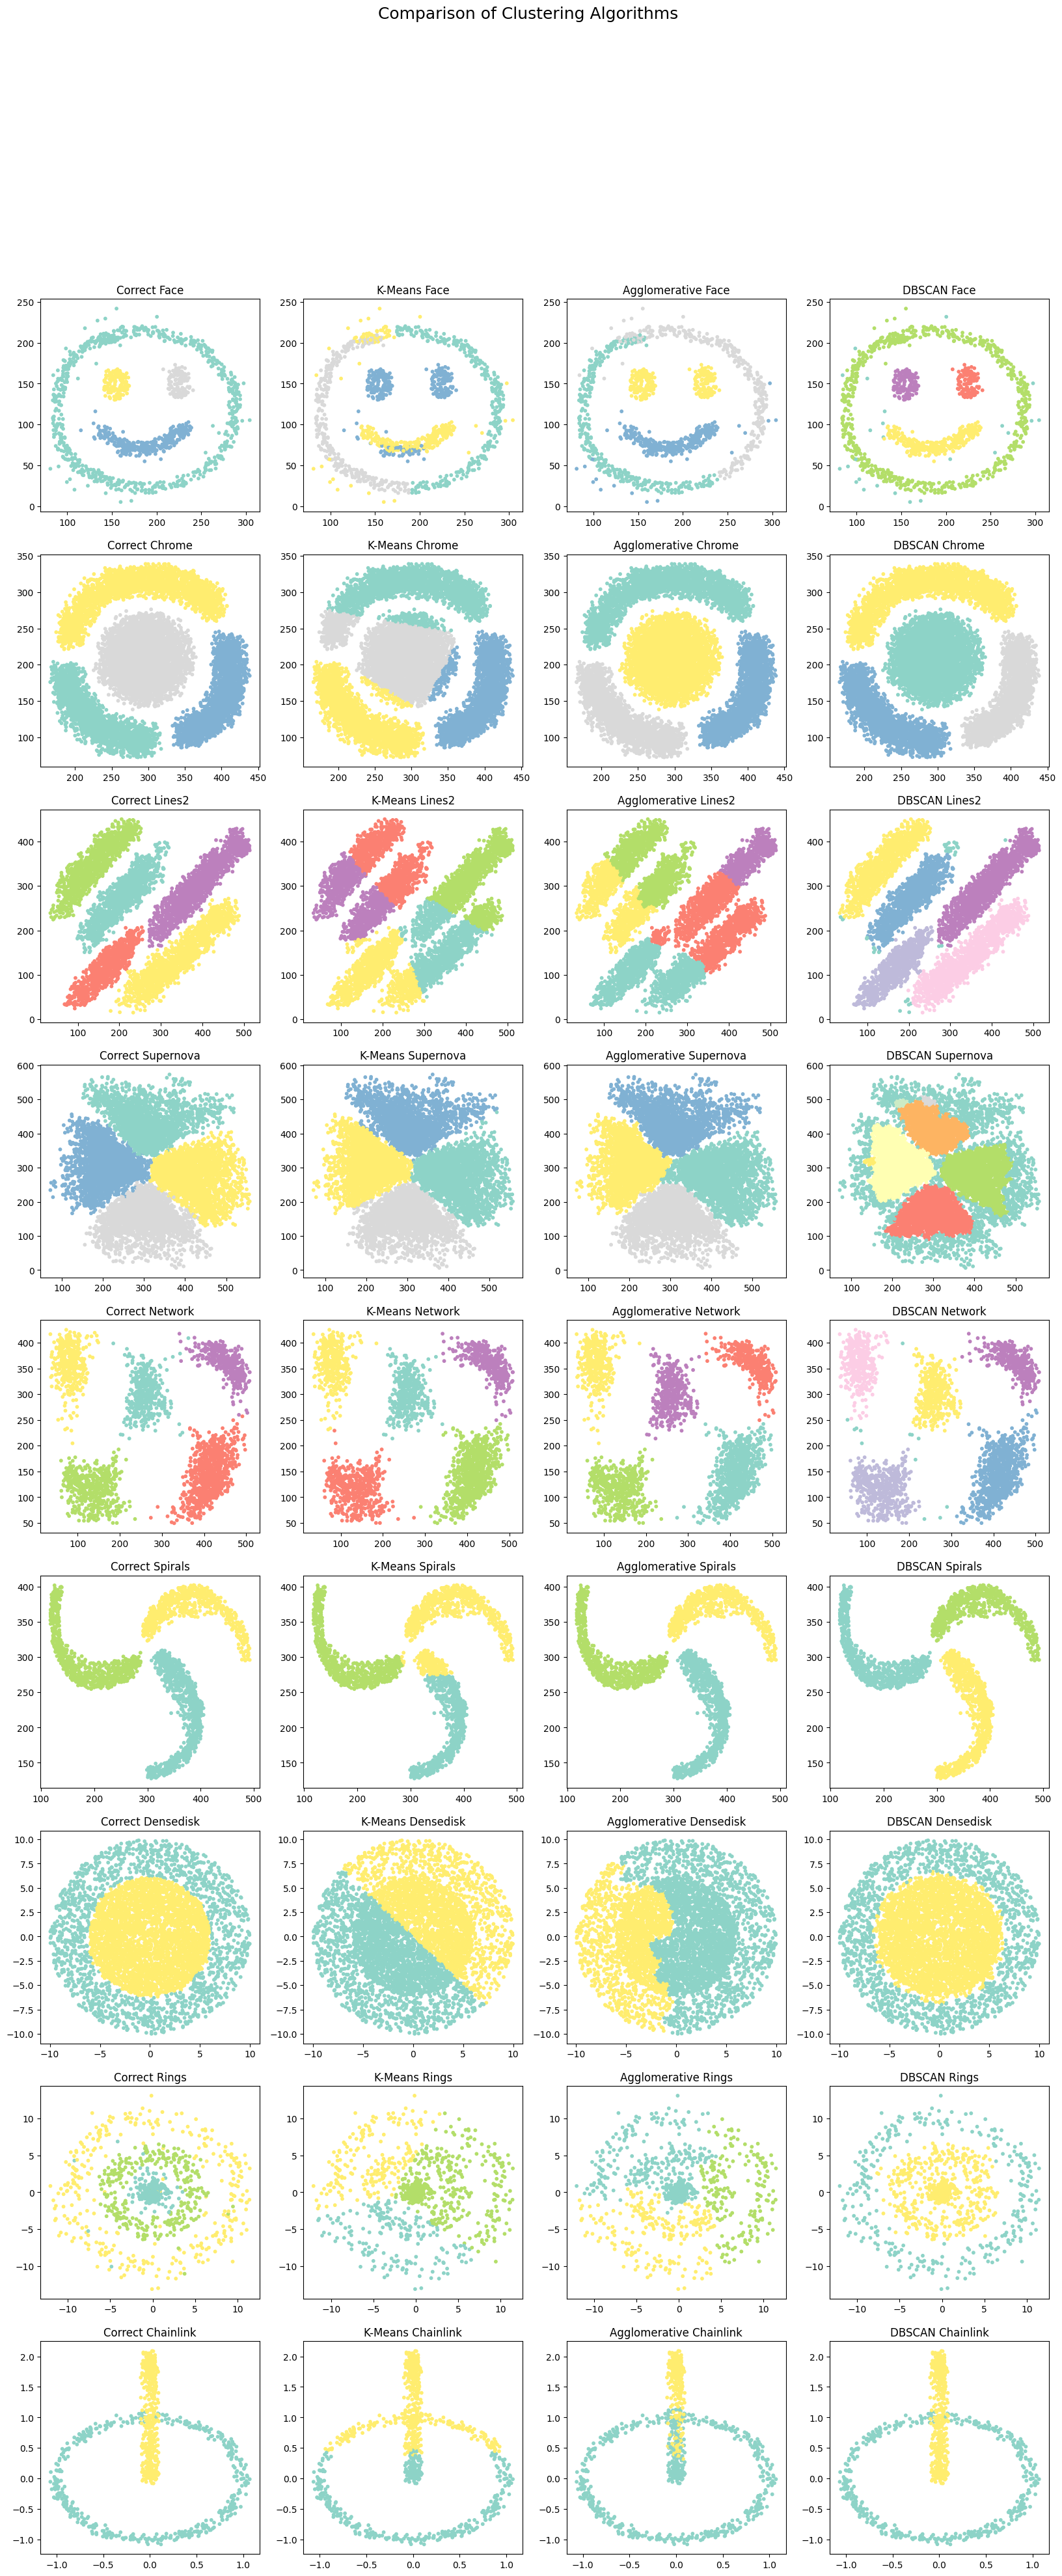

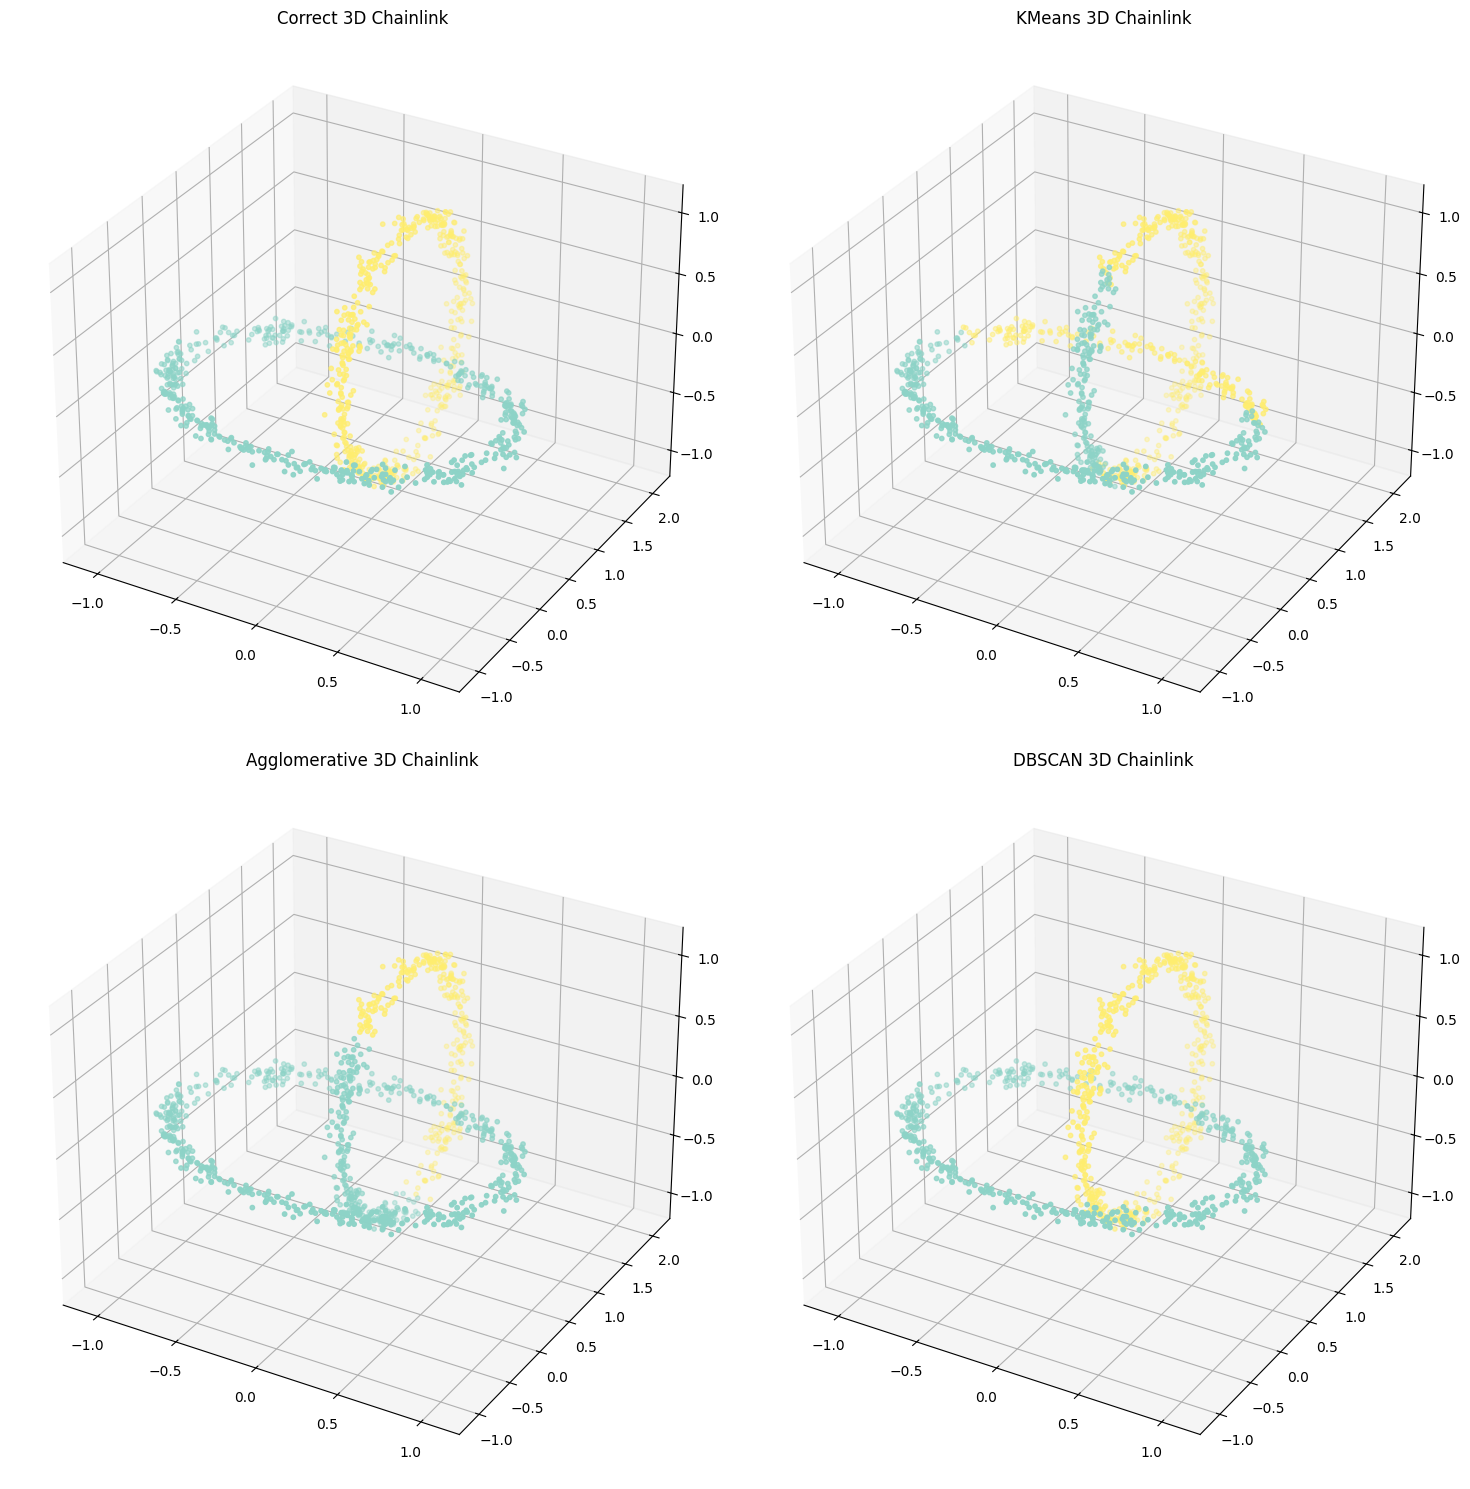

<Figure size 640x480 with 0 Axes>

In [633]:
import matplotlib.pyplot as plt

# Example definitions of the datasets and their clustering results
datasets = [
    ("Face", face_df, face_kmeans_df, face_agglomerative_df, face_dbscan_df),
    ("Chrome", chrome_df, chrome_kmeans_df, chrome_agglomerative_df, chrome_dbscan_df),
    ("Lines2", lines2_df, lines2_kmeans_df, lines2_agglomerative_df, lines2_dbscan_df),
    ("Supernova", supernova_df, supernova_kmeans_df, supernova_agglomerative_df, supernova_dbscan_df),
    ("Network", network_df, network_kmeans_df, network_agglomerative_df, network_dbscan_df),
    ("Spirals", spirals_df, spirals_kmeans_df, spirals_agglomerative_df, spirals_dbscan_df),
    ("Densedisk", densedisk_df, densedisk_kmeans_df, densedisk_agglomerative_df, densedisk_dbscan_df),
    ("Rings", rings_df, rings_kmeans_df, rings_agglomerative_df, rings_dbscan_df),
    ("Chainlink", chainlink_df, chainlink_kmeans_df, chainlink_agglomerative_df, chainlink_dbscan_df),
]

fig, axes = plt.subplots(nrows=len(datasets), ncols=4, figsize=(20, 5 * len(datasets)))
fig.suptitle('Comparison of Clustering Algorithms\n', size=18)

# Iterate through the datasets
for i, (name, correct_df, kmeans_df, agg_df, dbscan_df) in enumerate(datasets):
    # Correct Clustering
    axes[i, 0].scatter(correct_df['x'], correct_df['y'], c=correct_df['color'], s=10, cmap="Set3")
    axes[i, 0].set_title(f"Correct {name}")

    # K-means Clustering
    axes[i, 1].scatter(kmeans_df['x'], kmeans_df['y'], c=kmeans_df['Cluster'], s=10, cmap="Set3")
    axes[i, 1].set_title(f"K-Means {name}")

    # Agglomerative Clustering
    axes[i, 2].scatter(agg_df['x'], agg_df['y'], c=agg_df['Cluster'], s=10, cmap="Set3")
    axes[i, 2].set_title(f"Agglomerative {name}")

    # DBSCAN Clustering
    axes[i, 3].scatter(dbscan_df['x'], dbscan_df['y'], c=dbscan_df['Cluster'], s=10, cmap="Set3")
    axes[i, 3].set_title(f"DBSCAN {name}")

    if name == "Chainlink":
        # 3D Plots for Chainlink (Separate figure for 3D plots)
        fig_3d = plt.figure(figsize=(15, 15))

        # Correct 3D Plot
        ax3d_correct = fig_3d.add_subplot(221, projection='3d')  # 2x2 grid, first position
        ax3d_correct.scatter(correct_df['x'], correct_df['y'], correct_df['z'], c=correct_df['color'], s=10, cmap="Set3")
        ax3d_correct.set_title(f"Correct 3D {name}")

        # K-Means 3D Plot
        ax3d_kmeans = fig_3d.add_subplot(222, projection='3d')  # 2x2 grid, second position
        ax3d_kmeans.scatter(kmeans_df['x'], kmeans_df['y'], kmeans_df['z'], c=kmeans_df['Cluster'], s=10, cmap="Set3")
        ax3d_kmeans.set_title(f"KMeans 3D {name}")

        # Agglomerative 3D Plot
        ax3d_agg = fig_3d.add_subplot(223, projection='3d')  # 2x2 grid, third position
        ax3d_agg.scatter(agg_df['x'], agg_df['y'], agg_df['z'], c=agg_df['Cluster'], s=10, cmap="Set3")
        ax3d_agg.set_title(f"Agglomerative 3D {name}")

        # DBSCAN 3D Plot
        ax3d_dbscan = fig_3d.add_subplot(224, projection='3d')  # 2x2 grid, fourth position
        ax3d_dbscan.scatter(dbscan_df['x'], dbscan_df['y'], dbscan_df['z'], c=dbscan_df['Cluster'], s=10, cmap="Set3")
        ax3d_dbscan.set_title(f"DBSCAN 3D {name}")

        plt.tight_layout()
        plt.show()

# Adjust layout for 2D plots and show
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
